In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import io
import requests
import re
import warnings
import os
print(os.listdir("../input"))
import plotly.express as px

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-notebook')
from matplotlib.ticker import StrMethodFormatter
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelBinarizer

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

['titanic', 'gender-submisson', 'test-file']
/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv
/kaggle/input/gender-submisson/gender_submission.csv
/kaggle/input/test-file/test.csv


Passengers from port **‘**Southampton**’** have a low survival rate of **34%**,
while those from the port **‘**Cherbourg**’** have a survival rate of **55%**.

Over **72%** of the passengers embarked from the port 'Southampton’, 18% from the port ‘Cherbourg’ and the rest from the port ‘Queenstown’.

In [2]:
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# Gender

In [4]:
gender_data = pd.read_csv("/kaggle/input/titanic/gender_submission.csv")
gender_data.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [5]:
women = train_data.loc[train_data.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women)

% of women who survived: 0.7420382165605095


**Women and children** were the first to board the titanic which means they are more likely to survive than men

In [6]:
men = train_data.loc[train_data.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("% of men who survived:", rate_men)

% of men who survived: 0.18890814558058924


# Age

The younger you are the more likely to survive

In [7]:
data = [train_data, test_data]
for dataset in data:
    mean = train_data["Age"].mean()
    std = test_data["Age"].std()
    is_null = dataset["Age"].isnull().sum()
    # compute random numbers between the mean, std and is_null
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    # fill NaN values in Age column with random values generated
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Age"] = age_slice
    dataset["Age"] = train_data["Age"].astype(int)

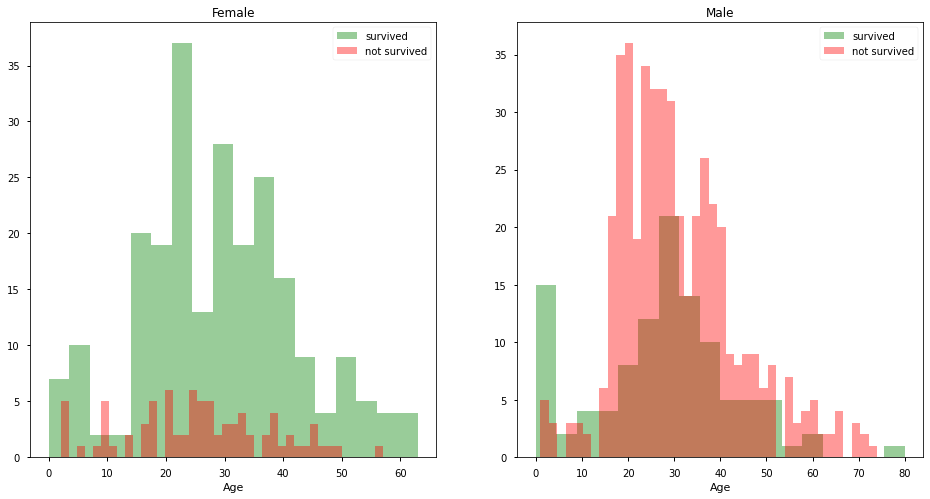

In [8]:
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(16, 8))
women = train_data[train_data['Sex']=='female']
men = train_data[train_data['Sex']=='male']
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False, color="green")
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False, color="red")
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False, color="green")
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False, color="red")
ax.legend()
_ = ax.set_title('Male');

In [9]:
df = pd.read_csv('../input/titanic/train.csv')
fig = px.scatter_3d(df, x='Name', y='Sex', z='Age',
                    color='Age')
fig.show()

# Class

You have a higher chance of surviving if you have a first class ticket than having a second or third

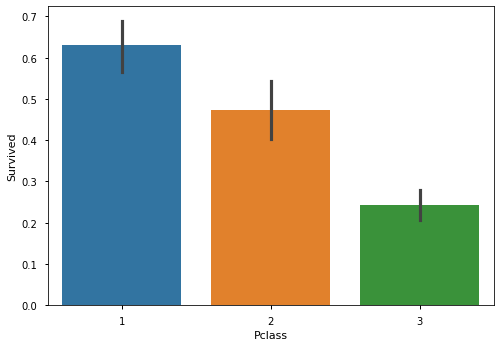

In [10]:
sns.barplot(x='Pclass', y='Survived', data=train_data);

# Embark

Women will survive more if they embarked from port ‘Southampton’ or ‘ Queenstown’. While men will survive more from the port 'Cherbourg'

In [11]:
embarked_mode = train_data['Embarked'].mode()
data = [train_data, test_data]
for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(embarked_mode)

/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:243: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



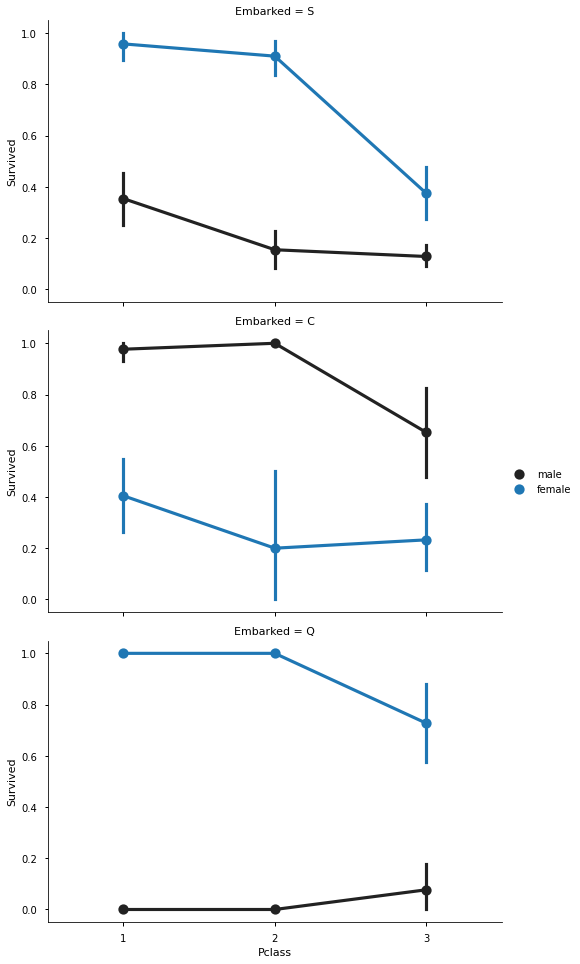

In [12]:
FacetGrid = sns.FacetGrid(train_data, row='Embarked', size=4.5, aspect=1.6)
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', order=None, hue_order=None )
FacetGrid.add_legend();

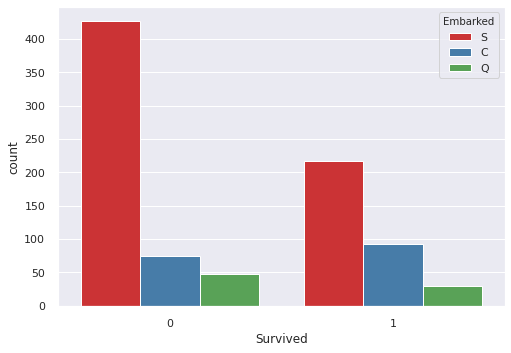

In [13]:
sns.set(style="darkgrid")
sns.countplot( x='Survived', data=train_data, hue="Embarked", palette="Set1");

# Relatives

You are more likly to survive if you are travels with 1 to 3 people and if you have 0 or more than three you have a less chance.

/opt/conda/lib/python3.6/site-packages/seaborn/categorical.py:3669: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.



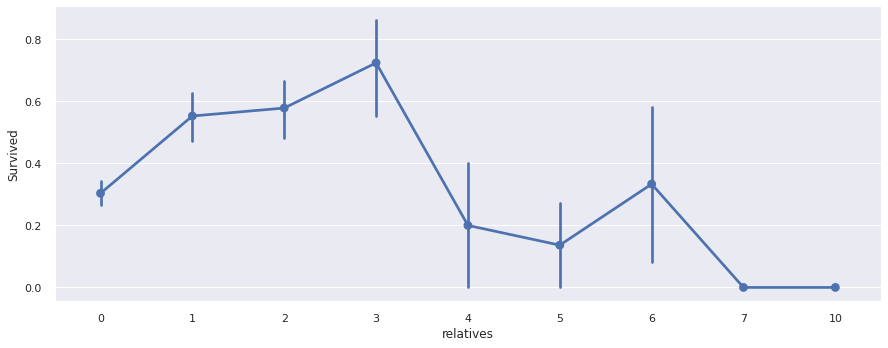

In [14]:
data = [train_data, test_data]
for dataset in data:
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['relatives'] > 0, 'travelled_alone'] = 'No'
    dataset.loc[dataset['relatives'] == 0, 'travelled_alone'] = 'Yes'
axes = sns.factorplot('relatives','Survived', 
                      data=train_data, aspect = 2.5, );

In [15]:
'''train_numerical_features = list(train_data.select_dtypes(include=['int64', 'float64', 'int32']).columns)
ss_scaler = StandardScaler()
train_data_ss = pd.DataFrame(data = train_data)
train_data_ss[train_numerical_features] = ss_scaler.fit_transform(train_data_ss[train_numerical_features])'''

"train_numerical_features = list(train_data.select_dtypes(include=['int64', 'float64', 'int32']).columns)\nss_scaler = StandardScaler()\ntrain_data_ss = pd.DataFrame(data = train_data)\ntrain_data_ss[train_numerical_features] = ss_scaler.fit_transform(train_data_ss[train_numerical_features])"

In [16]:
#train_data_ss.head()

In [17]:
param_test1 = {
    'n_estimators': [100,200,500,750,1000],
    'max_depth': [3,5,7,9],
    'min_child_weight': [1,3,5],
    'gamma':[i/10.0 for i in range(0,5)],
    'subsample':[i/10.0 for i in range(6,10)],
    'colsample_bytree':[i/10.0 for i in range(6,10)],
    'reg_alpha':[0, 0.001, 0.005, 0.01, 0.05, 0.1, 1],
    'learning_rate': [0.01, 0.02, 0.05, 0.1]
}

In [18]:
url="https://github.com/thisisjasonjafari/my-datascientise-handcode/raw/master/005-datavisualization/titanic.csv"
s=requests.get(url).content
c=pd.read_csv(io.StringIO(s.decode('utf-8')))
 
test_labels = c
test = pd.read_csv('../input/titanic/test.csv')

warnings.filterwarnings('ignore')

for i, name in enumerate(test_labels['name']):
    if '"' in name:
        test_labels['name'][i] = re.sub('"', '', name)
        
for i, name in enumerate(test['Name']):
    if '"' in name:
        test['Name'][i] = re.sub('"', '', name)
        
survived = []

for name in test['Name']:
    survived.append(int(test_labels.loc[test_labels['name'] == name]['survived'].values[-1]))

    
submission = pd.read_csv('../input/titanic/gender_submission.csv')
submission['Survived'] = survived
submission.to_csv('sub_titanic.csv', index=False)

In [19]:
train_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,relatives,travelled_alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,1,No
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,1,No
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,0,Yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,1,No
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,0,Yes
5,6,0,3,"Moran, Mr. James",male,28,0,0,330877,8.4583,NaN,Q,0,Yes
6,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S,0,Yes
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,NaN,S,4,No
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,NaN,S,2,No
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,NaN,C,1,No


# In conclusion
 **There are many things for a greater chance to survive. Being a female or a child will increase you chances. If you have a higher class ticket you have the more chance of surviving than a third class ticket. As for a man, you are more likely to survive if embark in Cherbourg compare to Southampton or Queenstown. If you also travel with 1 or 3 people than 0 or more than 3 your survival chances are greater. The younger you are will also make your survival chance. So it comes down to many things to surivive on the titanic.**

In [20]:
from sklearn.ensemble import RandomForestClassifier

#data["Age"] = data["Age"].astype(int)
#if ["Age"]

y = train_data["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

model = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=2)
model.fit(X, y)
predictions = model.predict(X_test)
